In [1]:
import tensorflow.keras.backend as K
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import itertools
import random

In [2]:
def build_model():
    """ This function builds a functional model"""
    

    inputs =  keras.Input(shape=(28,28),name="input_layer")
    x =  keras.layers.Flatten()(inputs)
    
    x =  keras.layers.Dense(32,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)

    x =  keras.layers.Dense(64,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(128,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(64,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(32,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)

    outputs =  keras.layers.Dense(10,activation="softmax")(x)


    model =  keras.Model(inputs=inputs,outputs=outputs,name="mnist_model")
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.RMSprop(),metrics=["accuracy"],)
    
    return model

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

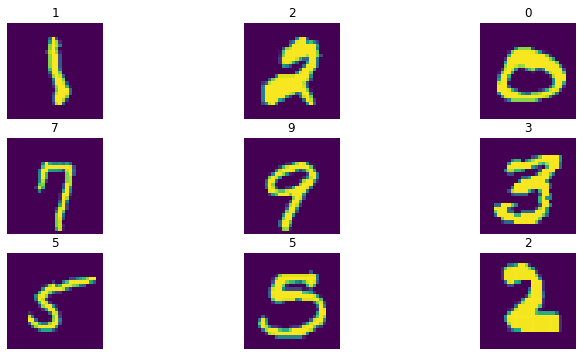

In [4]:
plt.figure(figsize=(12,6))
samples = np.random.randint(0,len(x_train),9)
for i in range(len(samples)):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[samples[i]],interpolation='nearest')
    plt.title(str(y_train[samples[i]]))
    plt.axis("off")

In [5]:
model = build_model()

In [6]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [7]:
history = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_split=0.2)

Epoch 1/2
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0008 - accuracy: 0.6928 - val_loss: 0.2733 - val_accuracy: 0.9222
Epoch 2/2
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5567 - accuracy: 0.8476 - val_loss: 0.2477 - val_accuracy: 0.9293


In [ ]:
# keras.utils.plot_model(model,"model.png",show_shapes=True)

In [8]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.2561 - accuracy: 0.9286
Test loss: 0.25613054633140564
Test accuracy: 0.928600013256073


In [9]:
def build_model():

    encoder_input =  keras.Input(shape=(28,28,1),name="img")

    x =  keras.layers.Conv2D(16, 3,activation="relu")(encoder_input)
    x = keras.layers.Conv2D(32, 3, activation="relu")(x)
    x = keras.layers.MaxPooling2D(3)(x)
    x = keras.layers.Conv2D(32, 3, activation="relu")(x)
    x = keras.layers.Conv2D(16, 3, activation="relu")(x)
    encoder_output =  keras.layers.GlobalMaxPooling2D()(x)
    
    encoder = keras.Model(encoder_input, encoder_output, name="encoder")
    
    # We are building an autoencoder now     
    x = keras.layers.Reshape((4, 4, 1))(encoder_output)
    x = keras.layers.Conv2DTranspose(16, 3, activation="relu")(x)
    x = keras.layers.Conv2DTranspose(32, 3, activation="relu")(x)
    x = keras.layers.UpSampling2D(3)(x)
    x = keras.layers.Conv2DTranspose(16, 3, activation="relu")(x)
    decoder_output = keras.layers.Conv2DTranspose(1, 3, activation="relu")(x)

    autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
    return encoder,autoencoder

In [10]:
encoder,autoencoder =  build_model()

In [ ]:
encoder.summary()

In [ ]:
autoencoder.summary()

In [12]:
# keras.utils.plot_model(autoencoder,'autoencoder.png',show_shapes=True)

In [13]:
def build_multi_model():
    """ This function builds a functional model"""
    

    inputs =  keras.Input(shape=(784,),name="input_layer")
    
    x =  keras.layers.Dense(32,activation="relu")(inputs)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)

    x =  keras.layers.Dense(64,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(128,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(64,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(32,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)

    outputs_identity =  keras.layers.Dense(10,activation="softmax",name="department")(x)
    
    outputs_gender =  keras.layers.Dense(2,activation="softmax",name="gender")(x)


    model =  keras.Model(inputs=inputs,outputs=[outputs_identity, outputs_gender],name="mnist_model")
    #     loss=["sparse_categorical_crossentropy",keras.losses.BinaryCrossentropy()], 
    model.compile(
        loss=["sparse_categorical_crossentropy","sparse_categorical_crossentropy"],
        optimizer=keras.optimizers.RMSprop(1e-3),
        metrics = ["accuracy"]
        )
    
    return model

In [14]:
# Here we are generating fake data
X,y =  make_classification(n_samples=100000, n_features=784,n_classes=10,n_clusters_per_class=4,n_informative=10)

In [15]:
y_2 = np.random.choice([0,1],len(y))  

In [16]:
model = build_multi_model()

In [ ]:
# model.summary()

In [ ]:
# keras.utils.plot_model(model,'multitask.png',show_shapes=True)

In [17]:
X  = X.astype("float32")

In [18]:
model.fit(x = X,y= {"department": y,"gender": y_2},epochs=2,batch_size=32)

Epoch 1/2
3125/3125 [==============================] - 11s 3ms/step - loss: 3.0462 - department_loss: 2.3276 - gender_loss: 0.7186 - department_accuracy: 0.1422 - gender_accuracy: 0.4984
Epoch 2/2
3125/3125 [==============================] - 9s 3ms/step - loss: 2.8470 - department_loss: 2.1528 - gender_loss: 0.6942 - department_accuracy: 0.2157 - gender_accuracy: 0.4985


In [19]:
def build_resnet():
    """ This function builds a functional model"""
    

    inputs =  keras.Input(shape=(784,),name="input_layer")
    
    x =  keras.layers.Dense(64,activation="relu")(inputs)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    block_1_output = x
    
    x =  keras.layers.Dense(64,activation="relu")(block_1_output)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    block_2_output =  keras.layers.add([x,block_1_output])
    
    x =  keras.layers.Dense(128,activation="relu")(block_2_output)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    block_3_output =  x
    
    x =  keras.layers.Dense(128,activation="relu")(block_3_output)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    block_4_output =  keras.layers.add([x,block_3_output])
    
    
    x =  keras.layers.Dense(64,activation="relu")(block_4_output)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    block_5_output =  keras.layers.add([x,block_1_output])
    x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
    
    x =  keras.layers.Dense(32,activation="relu")(block_5_output)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)

    outputs_identity =  keras.layers.Dense(10,activation="softmax",name="department")(x)
    
    outputs_gender =  keras.layers.Dense(2,activation="softmax",name="gender")(x)


    model =  keras.Model(inputs=inputs,outputs=[outputs_identity, outputs_gender],name="mnist_model")
    #     loss=["sparse_categorical_crossentropy",keras.losses.BinaryCrossentropy()], 
    model.compile(
        loss=["sparse_categorical_crossentropy","sparse_categorical_crossentropy"],
        optimizer=keras.optimizers.RMSprop(1e-3),
        metrics = ["accuracy"]
        )
    
    return model

In [20]:
model = build_resnet()

In [ ]:
# model.summary()

In [ ]:
# keras.utils.plot_model(model,'psudoresnet.png',show_shapes=True)

In [21]:
history = model.fit(x = X,y= {"department": y,"gender": y_2},epochs=2,batch_size=32,validation_split=0.2)

Epoch 1/2
2500/2500 [==============================] - 10s 4ms/step - loss: 3.0201 - department_loss: 2.2980 - gender_loss: 0.7221 - department_accuracy: 0.1667 - gender_accuracy: 0.5021 - val_loss: 2.7704 - val_department_loss: 2.0766 - val_gender_loss: 0.6938 - val_department_accuracy: 0.2474 - val_gender_accuracy: 0.5018
Epoch 2/2
2500/2500 [==============================] - 9s 3ms/step - loss: 2.7740 - department_loss: 2.0796 - gender_loss: 0.6944 - department_accuracy: 0.2522 - gender_accuracy: 0.4986 - val_loss: 2.6408 - val_department_loss: 1.9470 - val_gender_loss: 0.6938 - val_department_accuracy: 0.3115 - val_gender_accuracy: 0.4979


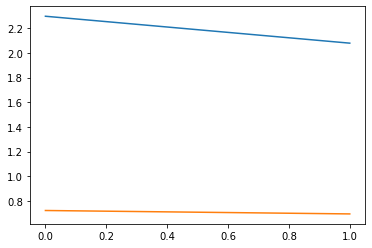

In [22]:
plt.plot(history.history['department_loss'])
plt.plot(history.history['gender_loss'])

In [33]:
def resnet():
    inputs = keras.Input(shape=(28, 28, 1), name="img")
    x = keras.layers.Conv2D(32, 3, activation="relu")(inputs)
    x = keras.layers.Conv2D(64, 3, activation="relu")(x)
    block_1_output = keras.layers.MaxPooling2D(3)(x)

    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    block_2_output = keras.layers.add([x, block_1_output])

    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    block_3_output = keras.layers.add([x, block_2_output])

    x = keras.layers.Conv2D(64, 3, activation="relu")(block_3_output)
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dropout(0.5)(x)
#     outputs = layers.Dense(10)(x)
    
    outputs_identity =  keras.layers.Dense(10,activation="softmax",name="department")(x)
    
    outputs_gender =  keras.layers.Dense(2,activation="softmax",name="gender")(x)


    model =  keras.Model(inputs=inputs,outputs=[outputs_identity, outputs_gender],name="toy_resnet")
    #     loss=["sparse_categorical_crossentropy",keras.losses.BinaryCrossentropy()], 
    model.compile(
        loss=["sparse_categorical_crossentropy","sparse_categorical_crossentropy"],
        optimizer=keras.optimizers.RMSprop(1e-3),
        metrics = ["accuracy"]
        )
    return model

In [27]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [34]:
model =  resnet()

In [40]:
# model.summary()

In [37]:
# keras.utils.plot_model(model,'toy_resnet.png',show_shapes=True)

In [39]:
y_train_2 = np.random.choice([0,1],len(y_train))
y_test_2 = np.random.choice([0,1],len(y_test))

In [42]:
history = model.fit(x = x_train,y= {"department": y_train,"gender": y_train_2},epochs=12,batch_size=32,validation_split=0.2)

Epoch 1/12
1500/1500 [==============================] - 10s 6ms/step - loss: 0.7453 - department_loss: 0.0470 - gender_loss: 0.6983 - department_accuracy: 0.9870 - gender_accuracy: 0.5014 - val_loss: 0.7347 - val_department_loss: 0.0384 - val_gender_loss: 0.6963 - val_department_accuracy: 0.9898 - val_gender_accuracy: 0.5000
Epoch 2/12
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7350 - department_loss: 0.0377 - gender_loss: 0.6974 - department_accuracy: 0.9895 - gender_accuracy: 0.4981 - val_loss: 0.7329 - val_department_loss: 0.0383 - val_gender_loss: 0.6946 - val_department_accuracy: 0.9897 - val_gender_accuracy: 0.5031
Epoch 3/12
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7297 - department_loss: 0.0327 - gender_loss: 0.6970 - department_accuracy: 0.9914 - gender_accuracy: 0.4972 - val_loss: 0.7351 - val_department_loss: 0.0411 - val_gender_loss: 0.6940 - val_department_accuracy: 0.9892 - val_gender_accuracy: 0.4968
Epoch 4/12
1500/1500 

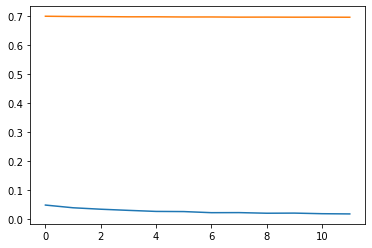

In [43]:
plt.plot(history.history['department_loss'])
plt.plot(history.history['gender_loss'])

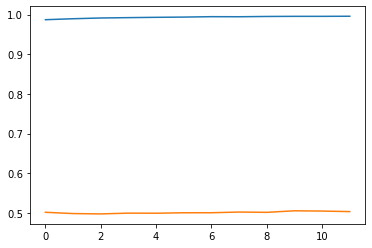

In [45]:
plt.plot(history.history['department_accuracy'])
plt.plot(history.history['gender_accuracy'])